# How to use sgd_ae.py Library along with a Mini Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from collections import Counter
import math
from sgd_AE import sgdescent
import cPickle as pickle

# Mini_Example: Recommending Food (items) to Animals (users)

## Load in your Pandas Dataframe containing your Training Ratings and Test Ratings.

### Columns must be in the order: User, Item, Rating. The column headings or not having headings is not an issue. 

### Training

In [24]:
mini_headings= ['Users','Food','Ratings']
mini_table= [['cat','chicken',5],['cat','veg',1],['dog','fries',5],['dog','pizza',5],\
['dog','chicken',5],['dog','veg',5],['fish','fries',2],['fish','veg',3],['turtle','fries',1],\
['turtle','pizza',1],['turtle','veg',5],['wolf','pizza',3],['wolf','chicken',5],\
['cow','veg',4],['chicken','fries',3],['chicken','pizza',3],['chicken','chicken',3],['chicken','veg',3]]
df_Training=pd.DataFrame(mini_table,columns=mini_headings)


In [25]:
print df_Training

      Users     Food  Ratings
0       cat  chicken        5
1       cat      veg        1
2       dog    fries        5
3       dog    pizza        5
4       dog  chicken        5
5       dog      veg        5
6      fish    fries        2
7      fish      veg        3
8    turtle    fries        1
9    turtle    pizza        1
10   turtle      veg        5
11     wolf    pizza        3
12     wolf  chicken        5
13      cow      veg        4
14  chicken    fries        3
15  chicken    pizza        3
16  chicken  chicken        3
17  chicken      veg        3


In [26]:
df_Test=pd.DataFrame([['cat','pizza',3],['cow','fries',2]],columns=['Users','Food','Ratings'])


In [27]:
print df_Test

  Users   Food  Ratings
0   cat  pizza        3
1   cow  fries        2


## Choose your paramaters:

latent_k = Parameter that is an integer of latent features

lambda_UV = Regularization parameter on U and V

lambda_bias = Regularization parameter on bias terms b' and b*

n_iters = Integer of the number of iterations of SGD to execute

alpha_rate= Parameter controling the learning rate

## Create an sgdesent Class instance

In [28]:
mini_model = sgdescent(df_Training, latent_k = 4, lambda_UV =0.01, lambda_bias=0.01, n_inter=220,alpha_rate= 0.01)

## Add in Test dataFrame

In [29]:
mini_model.Test(df_Test)

## Run .fit(mse_inter)

mse_inter a Paramater that is an integer and determines how often Mean Square Error is calculated on the Training and Test dataset. (example: every iteration, mse_inter=1 vs every 100,000 iteration, mse_inter=100000)

In [30]:
mini_model.fit(1)

TRAIN MSE: [ 7.39651686], Iteration 0 
TEST MSE: [ 10.88690595], Iteration 0 , Missing 0
TRAIN MSE: [ 7.33339122], Iteration 1 
TEST MSE: [ 10.88690595], Iteration 1 , Missing 0
TRAIN MSE: [ 6.84301151], Iteration 2 
TEST MSE: [ 9.85439279], Iteration 2 , Missing 0
TRAIN MSE: [ 6.78627345], Iteration 3 
TEST MSE: [ 9.78289238], Iteration 3 , Missing 0
TRAIN MSE: [ 6.73632504], Iteration 4 
TEST MSE: [ 9.71901145], Iteration 4 , Missing 0
TRAIN MSE: [ 6.45101402], Iteration 5 
TEST MSE: [ 9.43977566], Iteration 5 , Missing 0
TRAIN MSE: [ 6.13524225], Iteration 6 
TEST MSE: [ 9.08629944], Iteration 6 , Missing 0
TRAIN MSE: [ 6.12658413], Iteration 7 
TEST MSE: [ 9.06901743], Iteration 7 , Missing 0
TRAIN MSE: [ 6.10942307], Iteration 8 
TEST MSE: [ 9.04513528], Iteration 8 , Missing 0
TRAIN MSE: [ 5.71712272], Iteration 9 
TEST MSE: [ 8.48342716], Iteration 9 , Missing 0
TRAIN MSE: [ 5.59049267], Iteration 10 
TEST MSE: [ 8.48342716], Iteration 10 , Missing 0
TRAIN MSE: [ 5.34777937], It

([array([ 7.39651686]),
  array([ 7.33339122]),
  array([ 6.84301151]),
  array([ 6.78627345]),
  array([ 6.73632504]),
  array([ 6.45101402]),
  array([ 6.13524225]),
  array([ 6.12658413]),
  array([ 6.10942307]),
  array([ 5.71712272]),
  array([ 5.59049267]),
  array([ 5.34777937]),
  array([ 5.30888512]),
  array([ 5.23331363]),
  array([ 5.20948881]),
  array([ 5.16169443]),
  array([ 4.9953019]),
  array([ 4.734897]),
  array([ 4.73602785]),
  array([ 4.47559684]),
  array([ 4.43057389]),
  array([ 4.07575987]),
  array([ 4.10665025]),
  array([ 3.94259077]),
  array([ 3.94880099]),
  array([ 3.84551368]),
  array([ 3.81513947]),
  array([ 3.74939195]),
  array([ 3.71676517]),
  array([ 3.74745383]),
  array([ 3.49976393]),
  array([ 3.41399253]),
  array([ 3.25835552]),
  array([ 3.15269116]),
  array([ 3.09402472]),
  array([ 2.91921019]),
  array([ 2.91438807]),
  array([ 2.89903888]),
  array([ 2.86173631]),
  array([ 2.84061038]),
  array([ 2.84125912]),
  array([ 2.7945638

K:  4
Lamda UV:  0.01
Lamda bias:  0.01
Iterations:  220
Learning rate alpha:  0.01
Training = blue & Test = red


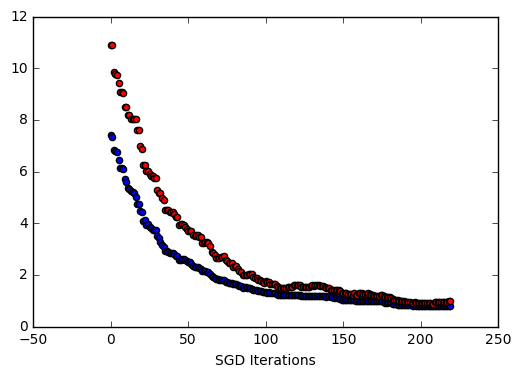

In [31]:
mini_model.plot_MSE()

# Now lets Predict the Top #1 Recommendation for a Squirrel

In [32]:
df_New_User = pd.DataFrame([['squirrel','chicken',5],['squirrel','pizza',2]],columns=['Users','Food','Ratings'])
mini_model.predict(df_New_User)

      Users     Food  Ratings
0  squirrel  chicken        5
1  squirrel    pizza        2
Predictions
  Top_Items  Relevance_Score
0       veg          3.91383


,Top_Items,Relevance_Score
0,veg,3.91383
